# Árboles de decisión, Random Forest, Adaboost, KNN Coarse (Número de vecinos alto para decidir entre 10 a 100).

## Decision Tree

Fitting 6 folds for each of 50 candidates, totalling 300 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 6}
Training time: 8.05 seconds

### Cross-Validation Metrics (4 folds) ###
Cross-Validation Accuracy: 0.94 ± 0.06
Cross-Validation Precision: 0.94 ± 0.05
Cross-Validation Recall: 0.94 ± 0.06
Cross-Validation F1-Score: 0.94 ± 0.06

### Test Set Metrics ###
Test Accuracy: 0.94
Test Precision: 0.94
Test Recall: 0.94
Test F1-Score: 0.94


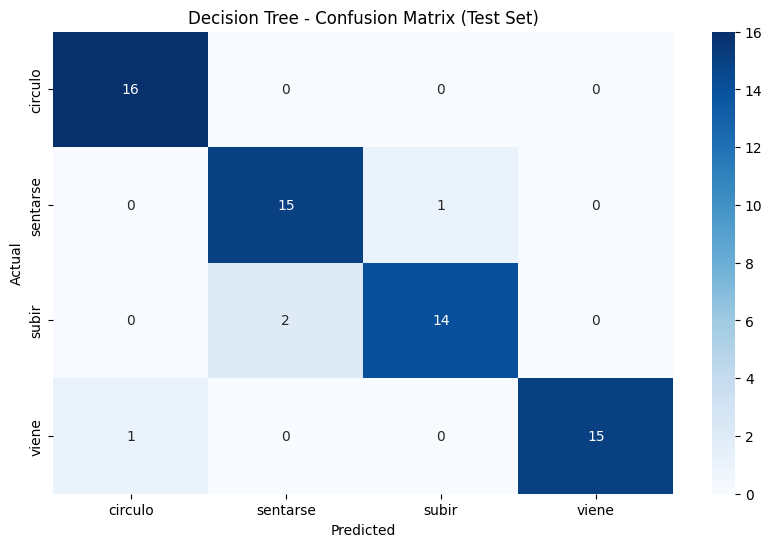

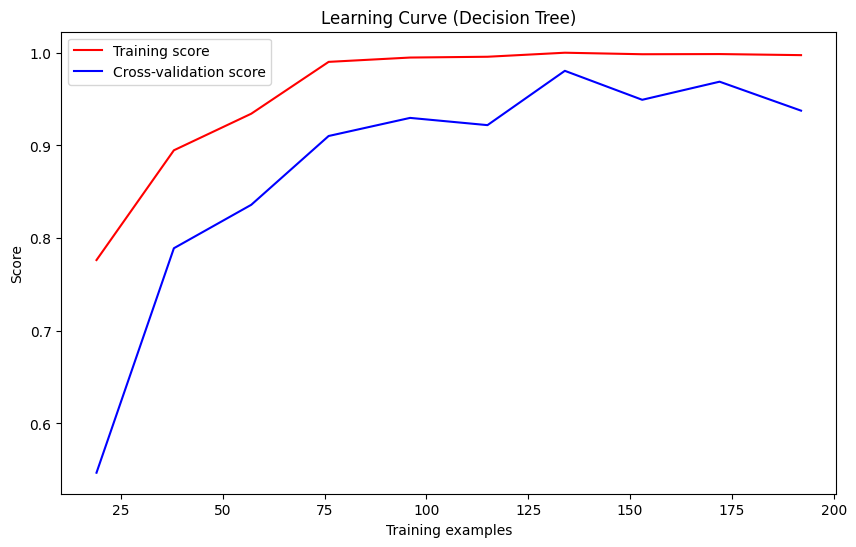

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para la búsqueda aleatoria
param_dist = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

classifier = DecisionTreeClassifier(random_state=0)

# Configurar 6 pliegos para RandomizedSearchCV
cv_random_search = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# RandomizedSearchCV para buscar los mejores hiperparámetros
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist,
                                   n_iter=50, cv=cv_random_search, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Tiempo de entrenamiento
start_time = time.time()

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Mejores hiperparámetros encontrados
print(f"Best parameters found: {random_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada con 4 pliegos para evaluar el modelo
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Métricas de validación cruzada
cv_accuracy = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
cv_precision = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='precision_weighted', n_jobs=-1)
cv_recall = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='recall_weighted', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)

print("\n### Cross-Validation Metrics (4 folds) ###")
print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.2f} ± {cv_accuracy.std():.2f}")
print(f"Cross-Validation Precision: {cv_precision.mean():.2f} ± {cv_precision.std():.2f}")
print(f"Cross-Validation Recall: {cv_recall.mean():.2f} ± {cv_recall.std():.2f}")
print(f"Cross-Validation F1-Score: {cv_f1.mean():.2f} ± {cv_f1.std():.2f}")

# Predicciones
y_pred = best_model.predict(X_test)

# Métricas del conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("\n### Test Set Metrics ###")
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Decision Tree - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje usando los mejores hiperparámetros
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (Decision Tree)")
plt.legend()
plt.show()

## Random Forest


Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters found: {'bootstrap': True, 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 30}
Training time: 31.96 seconds

Cross-Validation Scores: [1. 1. 1. 1.]
Mean CV Accuracy: 1.00
Standard Deviation of CV Accuracy: 0.00

### Model Performance Metrics (Test Set) ###
Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1-Score: 0.98


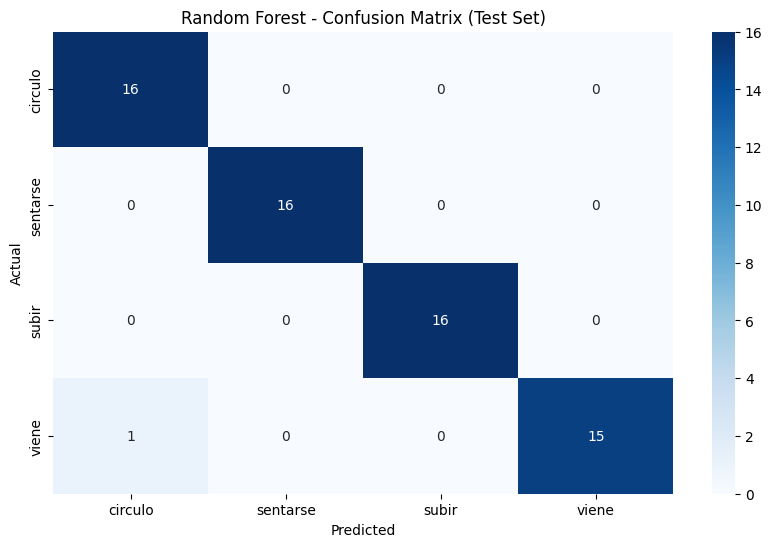

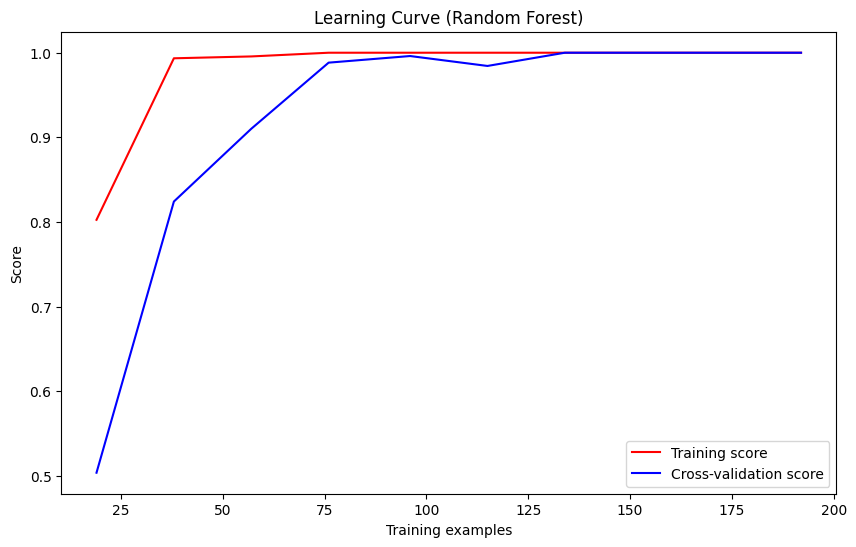

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, learning_curve, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': randint(10, 150),
    'max_depth': [None, 10, 20, 25],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

classifier = RandomForestClassifier(random_state=0)

# Validación cruzada a 4 pliegos
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Configurar RandomizedSearchCV para buscar los mejores hiperparámetros
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist,
                                   n_iter=50, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Tiempo de entrenamiento
start_time = time.time()

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Mejores hiperparámetros encontrados
print(f"Best parameters found: {random_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada con 4 pliegos en el conjunto de entrenamiento
cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"\nCross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.2f}")

# Métricas del modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Mostrar métricas
print("\n### Model Performance Metrics (Test Set) ###")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Random Forest - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Curva de aprendizaje con los mejores hiperparámetros
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (Random Forest)")
plt.legend()
plt.show()

##Adaboost

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters found: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Training time: 2.42 seconds

### Cross-Validation Results (4 folds) ###
Accuracy scores per fold: [0.96875  0.96875  0.9375   0.953125]
Mean accuracy: 0.96
Standard deviation: 0.01

### Test Set Performance Metrics ###
Accuracy: 0.95
Precision: 0.96
Recall: 0.95
F1-Score: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

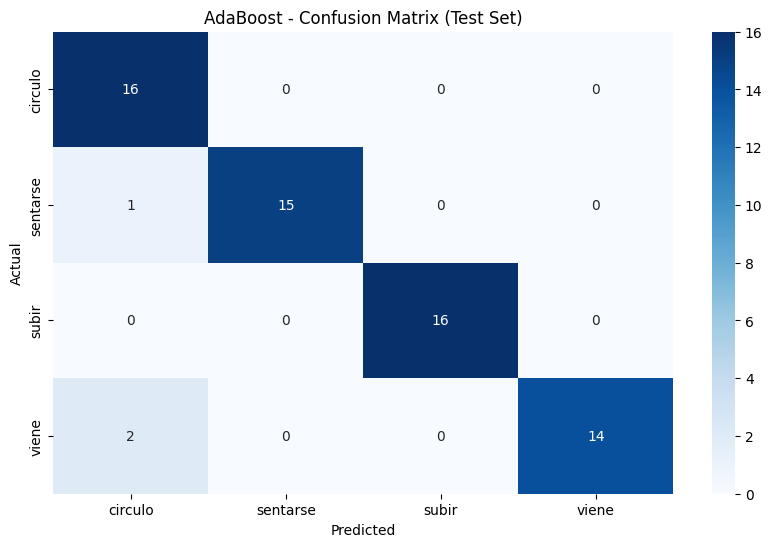

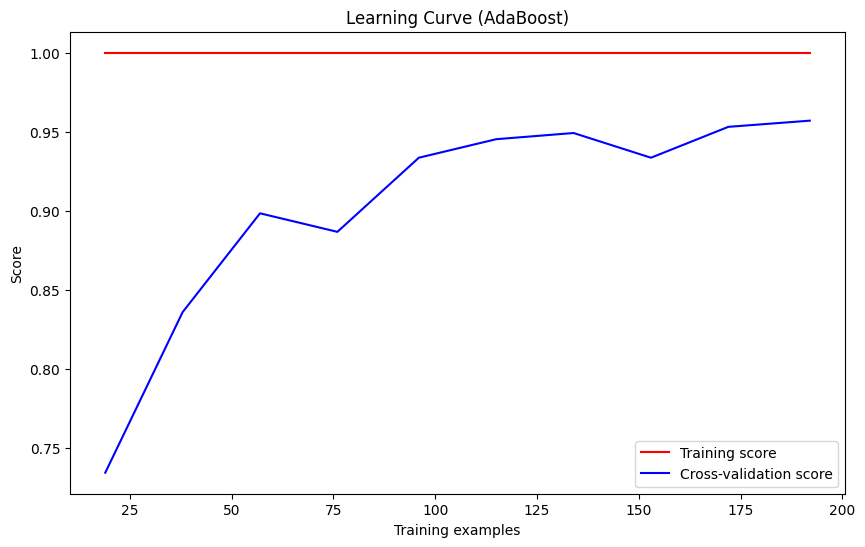

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para RandomizedSearchCV
param_dist = {
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 3),
    'criterion': ['gini', 'entropy']
}

# Clasificador base para AdaBoost
classifier = DecisionTreeClassifier(random_state=0)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Búsqueda aleatoria para optimizar el clasificador base
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist,
                                   n_iter=50, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Tiempo de entrenamiento
start_time = time.time()

random_search.fit(X_train, y_train)
best_base_model = random_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Resultados de la búsqueda de hiperparámetros
print(f"Best parameters found: {random_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# AdaBoost con el mejor clasificador base
clf = AdaBoostClassifier(
    estimator=best_base_model,
    n_estimators=10,
    learning_rate=0.6,
    random_state=42
)

clf.fit(X_train, y_train)

# Validación cruzada a 4 pliegos
cv_4 = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=cv_4, scoring='accuracy')

print("\n### Cross-Validation Results (4 folds) ###")
print(f"Accuracy scores per fold: {cross_val_scores}")
print(f"Mean accuracy: {np.mean(cross_val_scores):.2f}")
print(f"Standard deviation: {np.std(cross_val_scores):.2f}")

# Evaluación del modelo en el conjunto de prueba
y_pred = clf.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Mostrar métricas
print("\n### Test Set Performance Metrics ###")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('AdaBoost - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (AdaBoost)")
plt.legend()
plt.show()

## KNN Coarse (Número de vecinos alto, para elegir entre 10 y 100)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Training time: 1.11 seconds

### Cross-Validation Results (4 folds) ###
Accuracy scores per fold: [0.9375   0.90625  0.890625 0.96875 ]
Mean accuracy: 0.93
Standard deviation: 0.03

### Test Set Performance Metrics ###
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-Score: 0.91


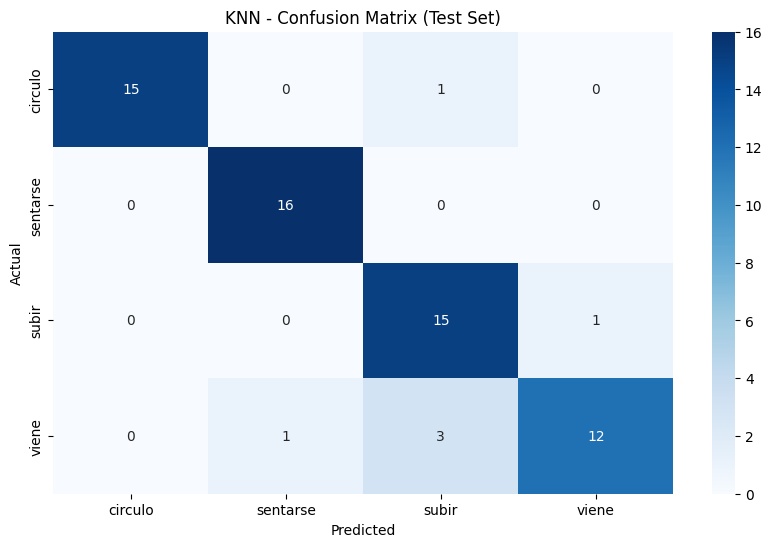

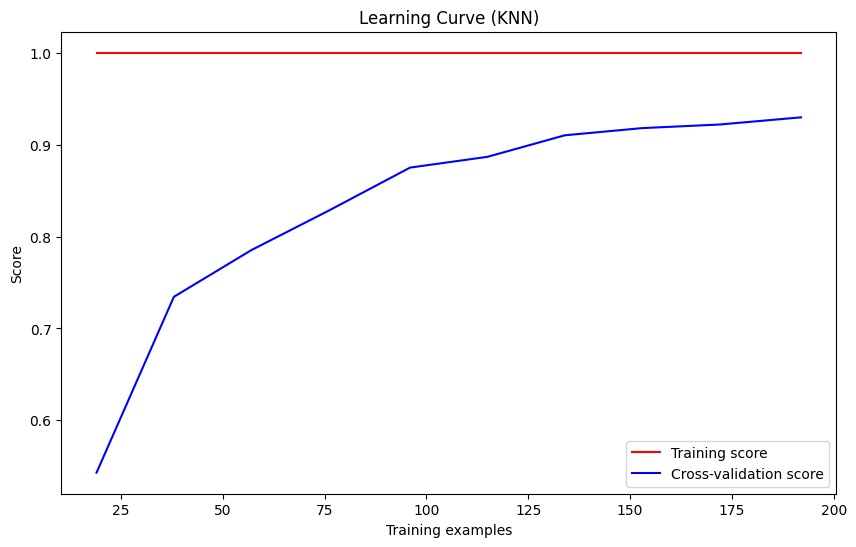

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para RandomizedSearchCV
param_dist = {
    'n_neighbors': randint(10, 101),  # Rango de vecinos (de 10 a 100)
    'weights': ['uniform', 'distance'],  # Estrategias de ponderación
    'metric': ['euclidean']  # Métricas de distancia
}

# Inicializar clasificador KNN
classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Búsqueda aleatoria para encontrar los mejores hiperparámetros
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist,
                                   n_iter=50, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Tiempo de entrenamiento
start_time = time.time()

random_search.fit(X_train, y_train)
best_knn_model = random_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Resultados de la búsqueda de hiperparámetros
print(f"Best parameters found: {random_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada a 4 pliegos
cv_4 = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)  # Cambiado a 4 pliegos
cross_val_scores = cross_val_score(best_knn_model, X_train, y_train, cv=cv_4, scoring='accuracy')

print("\n### Cross-Validation Results (4 folds) ###")
print(f"Accuracy scores per fold: {cross_val_scores}")
print(f"Mean accuracy: {np.mean(cross_val_scores):.2f}")
print(f"Standard deviation: {np.std(cross_val_scores):.2f}")

# Evaluación del modelo en el conjunto de prueba
y_pred = best_knn_model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Mostrar métricas
print("\n### Test Set Performance Metrics ###")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('KNN - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_knn_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (KNN)")
plt.legend()
plt.show()

# KNN Fine (Pocos vecinos muy cercanos para decidir, 1 a 3), KNN Minkowski, KNN Weighted, KNN Medium (Mediana).

## KNN Fine

Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Training time: 0.09 seconds

### Cross-Validation Results (4 folds) ###
Accuracy scores per fold: [0.96875  0.953125 0.9375   0.984375]
Mean accuracy: 0.96
Standard deviation: 0.02

### Test Set Performance Metrics ###
Accuracy: 0.92
Precision: 0.93
Recall: 0.92
F1-Score: 0.92


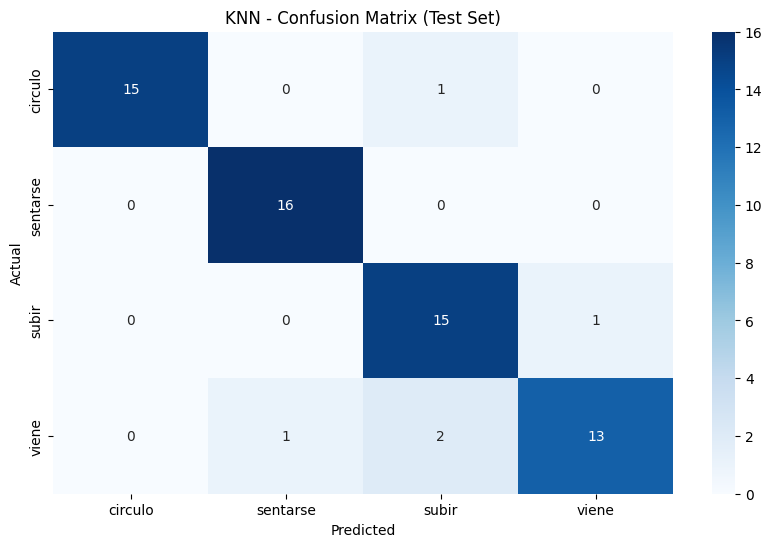

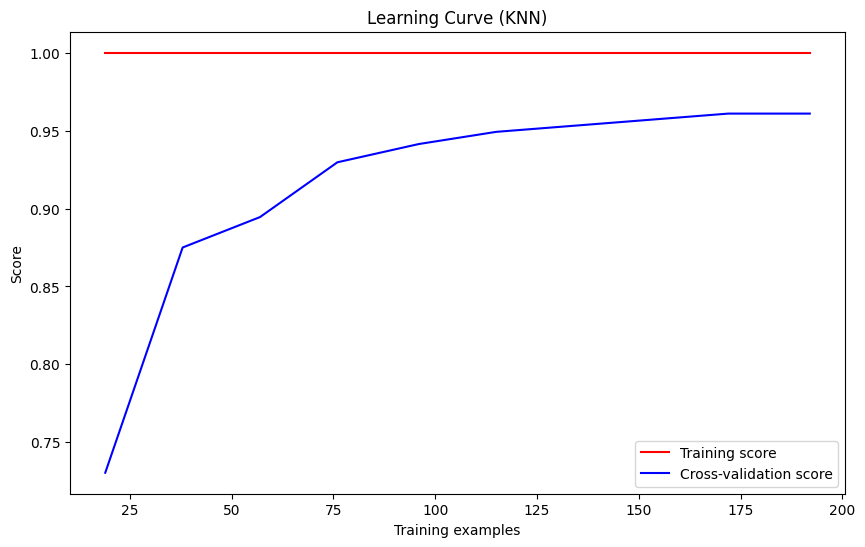

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para GridSearchCV
param_grid = {
    'n_neighbors': [1, 2, 3],         # Vecinos a considerar
    'weights': ['uniform'],  # Estrategias de ponderación
    'metric': ['euclidean']  # Métricas de distancia
}

# Inicializar clasificador KNN
classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)  # 4 pliegos

# Búsqueda en rejilla para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,
                           cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Tiempo de entrenamiento
start_time = time.time()

grid_search.fit(X_train, y_train)
best_knn_model = grid_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Resultados de la búsqueda de hiperparámetros
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada a 4 pliegos
cv_4 = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(best_knn_model, X_train, y_train, cv=cv_4, scoring='accuracy')

print("\n### Cross-Validation Results (4 folds) ###")
print(f"Accuracy scores per fold: {cross_val_scores}")
print(f"Mean accuracy: {np.mean(cross_val_scores):.2f}")
print(f"Standard deviation: {np.std(cross_val_scores):.2f}")

# Evaluación del modelo en el conjunto de prueba
y_pred = best_knn_model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Mostrar métricas
print("\n### Test Set Performance Metrics ###")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('KNN - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_knn_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (KNN)")
plt.legend()
plt.show()

## KNN Minkowski

Fitting 4 folds for each of 2 candidates, totalling 8 fits
Best parameters found: {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}
Training time: 0.04 seconds

### Cross-Validation Results (4 folds) ###
Accuracy scores per fold: [0.953125 0.9375   0.9375   0.96875 ]
Mean accuracy: 0.95
Standard deviation: 0.01

### Test Set Performance Metrics ###
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-Score: 0.91


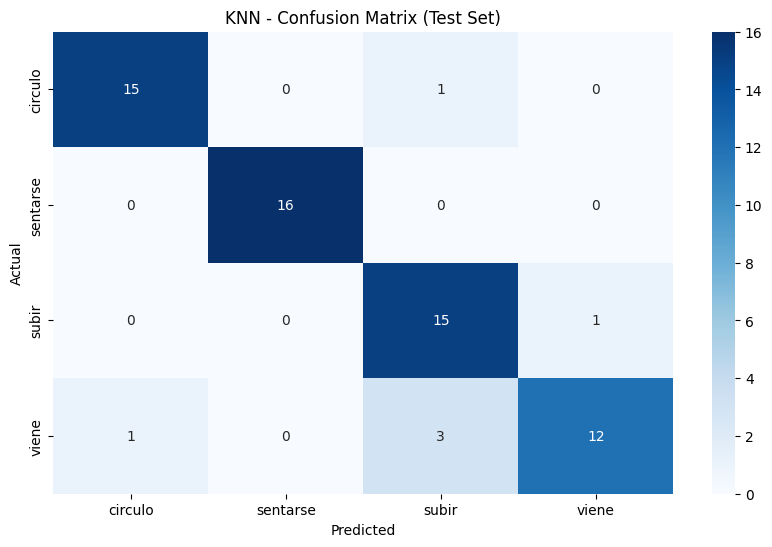

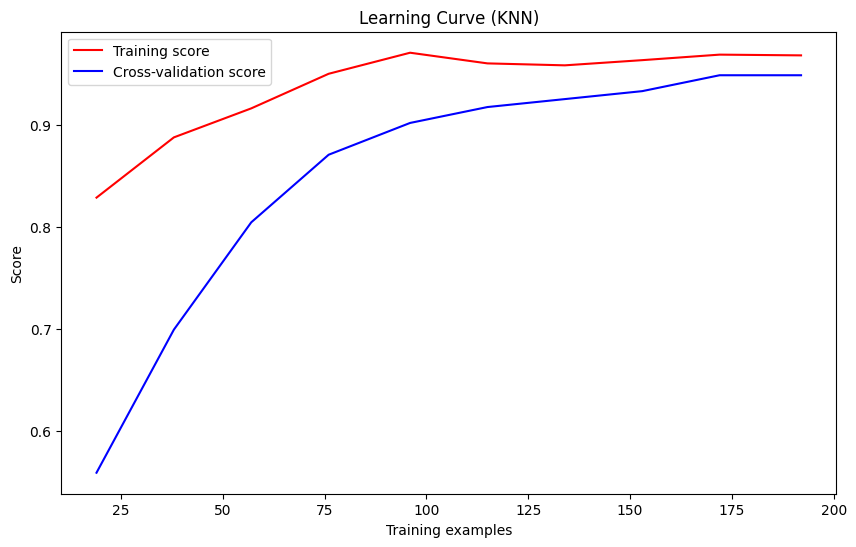

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para GridSearchCV
param_grid = {
    'n_neighbors': (3,100),         # Vecinos a considerar
    'weights': ['uniform'],  # Estrategias de ponderación
    'metric': ['minkowski']  # Métricas de distancia
}

# Inicializar clasificador KNN
classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)  # 4 pliegos

# Búsqueda en rejilla para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,
                           cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Tiempo de entrenamiento
start_time = time.time()

grid_search.fit(X_train, y_train)
best_knn_model = grid_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Resultados de la búsqueda de hiperparámetros
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada a 4 pliegos
cv_4 = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(best_knn_model, X_train, y_train, cv=cv_4, scoring='accuracy')

print("\n### Cross-Validation Results (4 folds) ###")
print(f"Accuracy scores per fold: {cross_val_scores}")
print(f"Mean accuracy: {np.mean(cross_val_scores):.2f}")
print(f"Standard deviation: {np.std(cross_val_scores):.2f}")

# Evaluación del modelo en el conjunto de prueba
y_pred = best_knn_model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Mostrar métricas
print("\n### Test Set Performance Metrics ###")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('KNN - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_knn_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (KNN)")
plt.legend()
plt.show()


## KNN Weighted

Fitting 4 folds for each of 2 candidates, totalling 8 fits
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Training time: 0.04 seconds

### Cross-Validation Results (4 folds) ###
Accuracy scores per fold: [0.953125 0.953125 0.9375   0.984375]
Mean accuracy: 0.96
Standard deviation: 0.02

### Test Set Performance Metrics ###
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-Score: 0.91


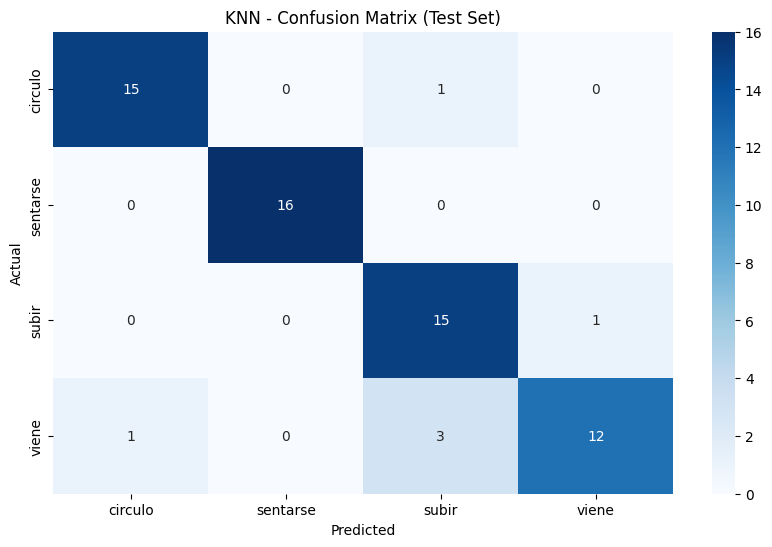

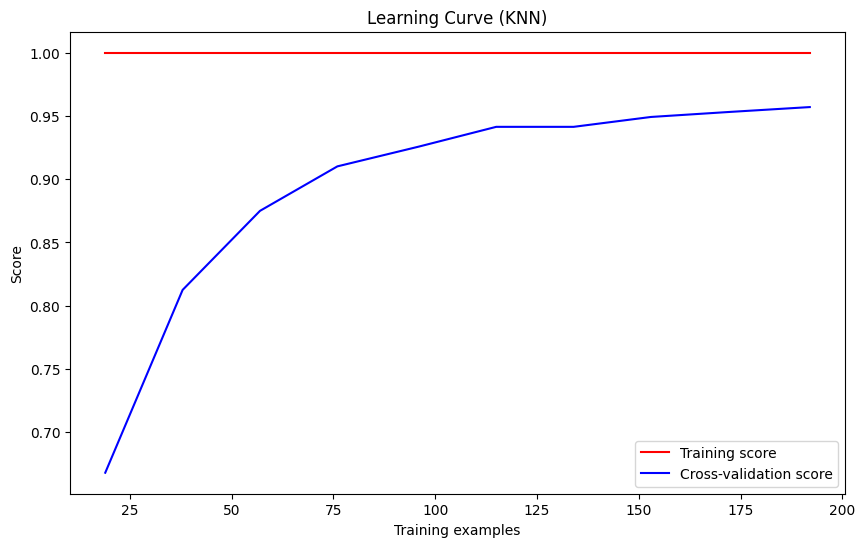

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para GridSearchCV
param_grid = {
    'n_neighbors': (3,100),         # Vecinos a considerar
    'weights': ['distance'],  # Estrategias de ponderación
    'metric': ['euclidean']  # Métricas de distancia
}

# Inicializar clasificador KNN
classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)  # 4 pliegos

# Búsqueda en rejilla para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,
                           cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Tiempo de entrenamiento
start_time = time.time()

grid_search.fit(X_train, y_train)
best_knn_model = grid_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Resultados de la búsqueda de hiperparámetros
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada a 4 pliegos
cv_4 = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(best_knn_model, X_train, y_train, cv=cv_4, scoring='accuracy')

print("\n### Cross-Validation Results (4 folds) ###")
print(f"Accuracy scores per fold: {cross_val_scores}")
print(f"Mean accuracy: {np.mean(cross_val_scores):.2f}")
print(f"Standard deviation: {np.std(cross_val_scores):.2f}")

# Evaluación del modelo en el conjunto de prueba
y_pred = best_knn_model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Mostrar métricas
print("\n### Test Set Performance Metrics ###")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('KNN - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_knn_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (KNN)")
plt.legend()
plt.show()

## KKN Medium

Fitting 4 folds for each of 2 candidates, totalling 8 fits
Best parameters found: {'n_neighbors': 3, 'weights': 'uniform'}
Training time: 4.98 seconds

### Cross-Validation Results (4 folds) ###
Accuracy scores per fold: [1.       0.953125 0.90625  0.96875 ]
Mean accuracy: 0.96
Standard deviation: 0.03

### Test Set Performance Metrics ###
Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1-Score: 0.98


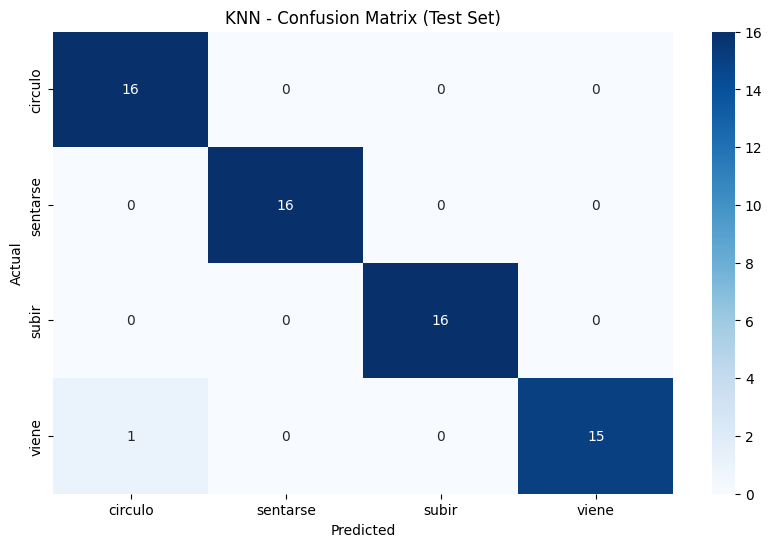

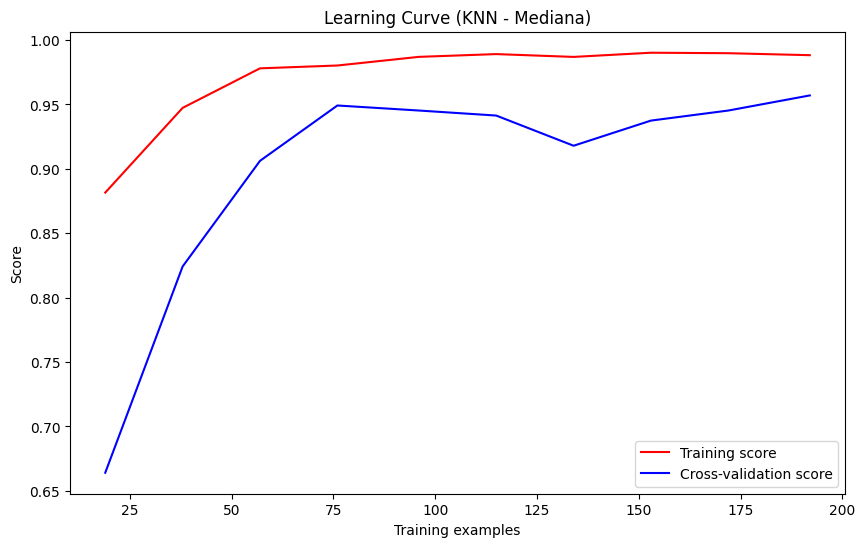

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Función personalizada para la distancia basada en la mediana
def median_distance(x1, x2):
    return np.median(np.abs(x1 - x2))

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para GridSearchCV
param_grid = {
    'n_neighbors': (3,100),         # Vecinos a considerar
    'weights': ['uniform']  # Estrategias de ponderación
}

# Inicializar clasificador KNN con métrica personalizada
classifier = KNeighborsClassifier(metric=median_distance)

# Definir validación cruzada
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Búsqueda en rejilla para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,
                           cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Tiempo de entrenamiento
start_time = time.time()

grid_search.fit(X_train, y_train)
best_knn_model = grid_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Resultados de la búsqueda de hiperparámetros
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada a 4 pliegos
cross_val_scores = cross_val_score(best_knn_model, X_train, y_train, cv=cv, scoring='accuracy')

print("\n### Cross-Validation Results (4 folds) ###")
print(f"Accuracy scores per fold: {cross_val_scores}")
print(f"Mean accuracy: {np.mean(cross_val_scores):.2f}")
print(f"Standard deviation: {np.std(cross_val_scores):.2f}")

# Evaluación del modelo en el conjunto de prueba
y_pred = best_knn_model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("\n### Test Set Performance Metrics ###")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('KNN - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_knn_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (KNN - Mediana)")
plt.legend()
plt.show()


# Naive Bayes Gaussian, Naive Bayes Kernel, LDA, KNN Cosine.

## Naive Bayes Gaussian

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'var_smoothing': 0.001}
Training time: 0.22 seconds

### Cross-Validation Results (4 folds) ###
Accuracy scores per fold: [0.84375  0.78125  0.734375 0.734375]
Mean accuracy: 0.77
Standard deviation: 0.04

### Test Set Performance Metrics ###
Accuracy: 0.80
Precision: 0.87
Recall: 0.80
F1-Score: 0.81


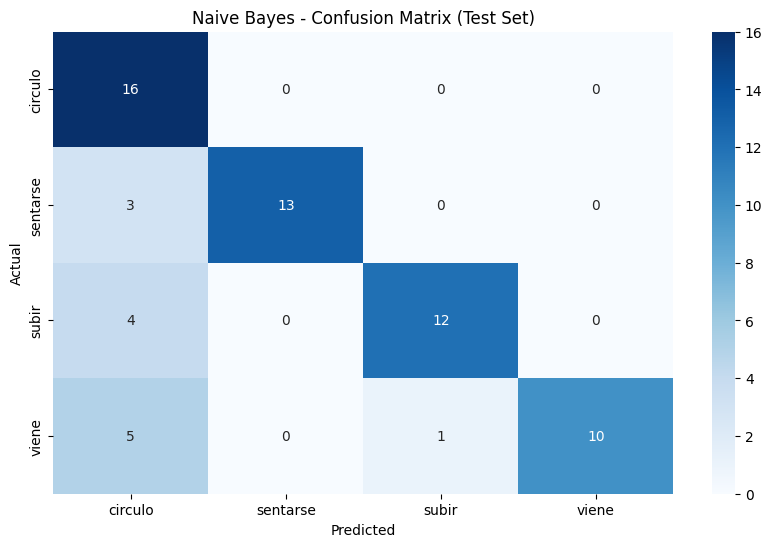

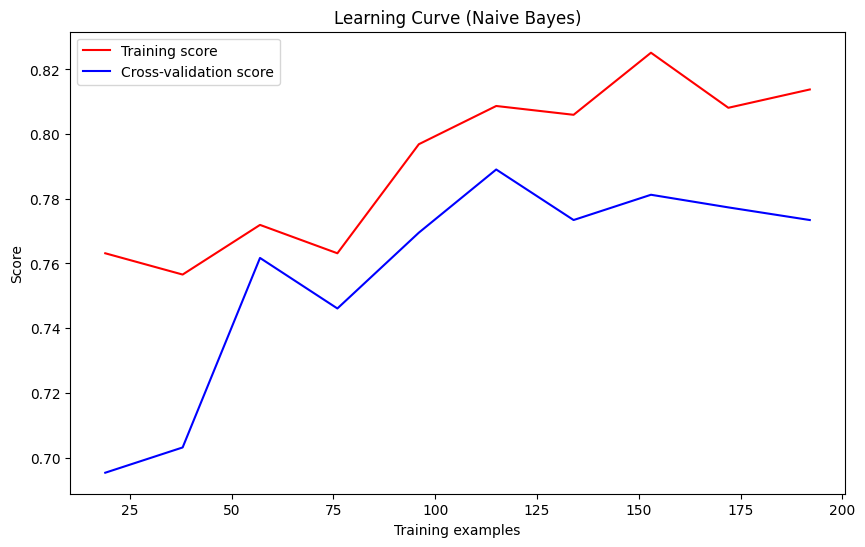

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
# Aplicación de PCA para reducir dimensionalidad
pca = PCA(n_components=.99)
X_pca = pca.fit_transform(X_scaled)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para RandomizedSearchCV
param_dist = {
    'var_smoothing': np.logspace(0, -9, 10)  # Varianza de suavizado en Naive Bayes
}

# Inicializar clasificador Naive Bayes Gaussiano
classifier = GaussianNB()

# Inicialización de la búsqueda aleatoria para encontrar los mejores hiperparámetros
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo con la búsqueda aleatoria
random_search.fit(X_train, y_train)
best_nb_model = random_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Resultados de la búsqueda de hiperparámetros
print(f"Best parameters found: {random_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)  # Cambiado a 4 pliegos
cross_val_scores = cross_val_score(best_nb_model, X_train, y_train, cv=cv, scoring='accuracy')

print("\n### Cross-Validation Results (4 folds) ###")
print(f"Accuracy scores per fold: {cross_val_scores}")
print(f"Mean accuracy: {np.mean(cross_val_scores):.2f}")
print(f"Standard deviation: {np.std(cross_val_scores):.2f}")

# Evaluación del modelo en el conjunto de prueba
y_pred = best_nb_model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Mostrar métricas
print("\n### Test Set Performance Metrics ###")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Naive Bayes - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_nb_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (Naive Bayes)")
plt.legend()
plt.show()


## Naive Bayes Kernel

Cross-Validation Accuracy: 0.88 ± 0.04
Cross-Validation Precision: 0.89 ± 0.04
Cross-Validation Recall: 0.88 ± 0.04
Cross-Validation F1 Score: 0.87 ± 0.04

Test Accuracy: 0.88
Test Precision: 0.89
Test Recall: 0.88
Test F1 Score: 0.87
Training time: 0.11 seconds


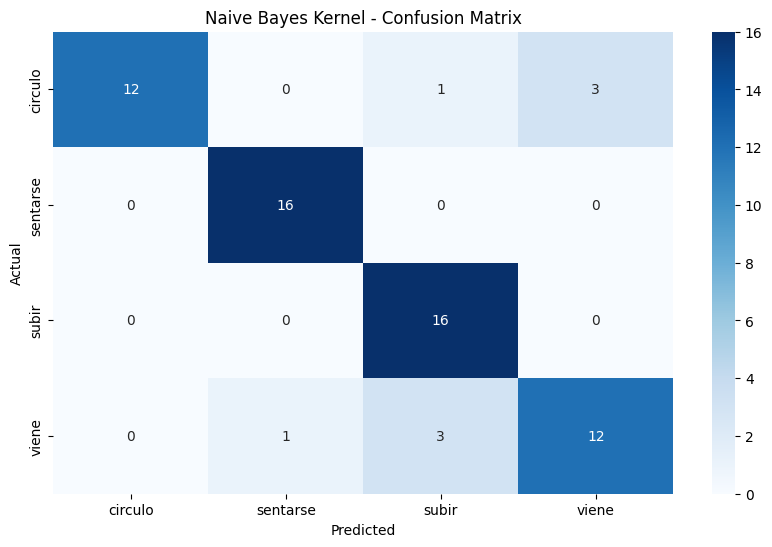

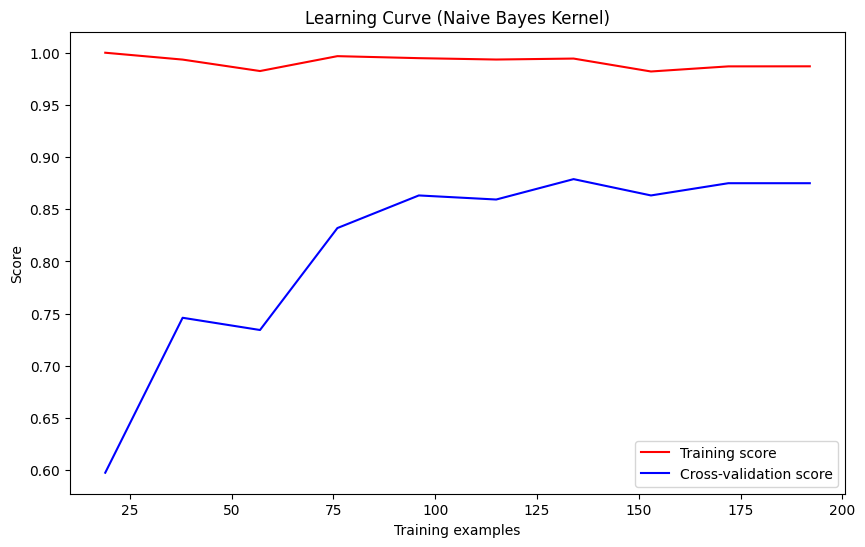

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Clase para implementar Naive Bayes Kernelizado
class NaiveBayesKernelized(BaseEstimator, ClassifierMixin):
    def __init__(self, bandwidth=0.5):
        self.bandwidth = bandwidth
        self.kde_models = {}
        self.priors = {}
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)

        # Para cada clase, ajustamos un KernelDensity para cada característica
        for cls in self.classes_:
            X_cls = X[y == cls]
            kde_list = []
            # Ajustar un modelo KDE por cada característica
            for feature in range(X.shape[1]):
                kde = KernelDensity(kernel="exponential", bandwidth=self.bandwidth).fit(X_cls[:, feature].reshape(-1, 1))
                kde_list.append(kde)
            self.kde_models[cls] = kde_list
            self.priors[cls] = len(X_cls) / len(X)
        return self

    def predict(self, X_test):
        predictions = []

        # Realizamos la predicción para cada muestra
        for x in X_test:
            scores = {}
            for cls in self.classes_:
                log_likelihood = np.log(self.priors[cls])

                # Para cada clase, sumamos los logaritmos de las densidades
                for i, kde in enumerate(self.kde_models[cls]):
                    log_likelihood += kde.score_samples([[x[i]]])[0]

                scores[cls] = log_likelihood

            # Predecir la clase con mayor log-verosimilitud
            predictions.append(max(scores, key=scores.get))

        return np.array(predictions)

# Cargar los datos
data = pd.read_csv('datasetPractice2.csv')
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# Aplicación de PCA para reducir dimensionalidad
pca = PCA()
X_pca = pca.fit_transform(X)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Crear el clasificador Naive Bayes Kernelizado
nbk_clf = NaiveBayesKernelized(bandwidth=0.5)

# Validación cruzada con 4 pliegos
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Obtener las métricas mediante validación cruzada
cross_val_scores = cross_val_score(nbk_clf, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_precision = cross_val_score(nbk_clf, X_train, y_train, cv=cv, scoring='precision_weighted')
cross_val_recall = cross_val_score(nbk_clf, X_train, y_train, cv=cv, scoring='recall_weighted')
cross_val_f1 = cross_val_score(nbk_clf, X_train, y_train, cv=cv, scoring='f1_weighted')

# Mostrar los resultados de la validación cruzada
print(f"Cross-Validation Accuracy: {np.mean(cross_val_scores):.2f} ± {np.std(cross_val_scores):.2f}")
print(f"Cross-Validation Precision: {np.mean(cross_val_precision):.2f} ± {np.std(cross_val_precision):.2f}")
print(f"Cross-Validation Recall: {np.mean(cross_val_recall):.2f} ± {np.std(cross_val_recall):.2f}")
print(f"Cross-Validation F1 Score: {np.mean(cross_val_f1):.2f} ± {np.std(cross_val_f1):.2f}")

# Tiempo de entrenamiento
start_time = time.time()
nbk_clf.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

# Predicción y evaluación en el conjunto de prueba
y_pred = nbk_clf.predict(X_test)

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"\nTest Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1 Score: {f1:.2f}")
print(f"Training time: {train_time:.2f} seconds")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=nbk_clf.classes_, yticklabels=nbk_clf.classes_)
plt.title('Naive Bayes Kernel - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    nbk_clf, X_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Promediar las puntuaciones de entrenamiento y validación
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (Naive Bayes Kernel)")
plt.legend()
plt.show()


## LDA

Cross-Validation Accuracy: 0.80 ± 0.02
Cross-Validation Precision: 0.88 ± 0.01
Cross-Validation Recall: 0.80 ± 0.02
Cross-Validation F1 Score: 0.81 ± 0.02

Test Accuracy: 0.78
Test Precision: 0.88
Test Recall: 0.78
Test F1 Score: 0.80
Training time: 0.01 seconds


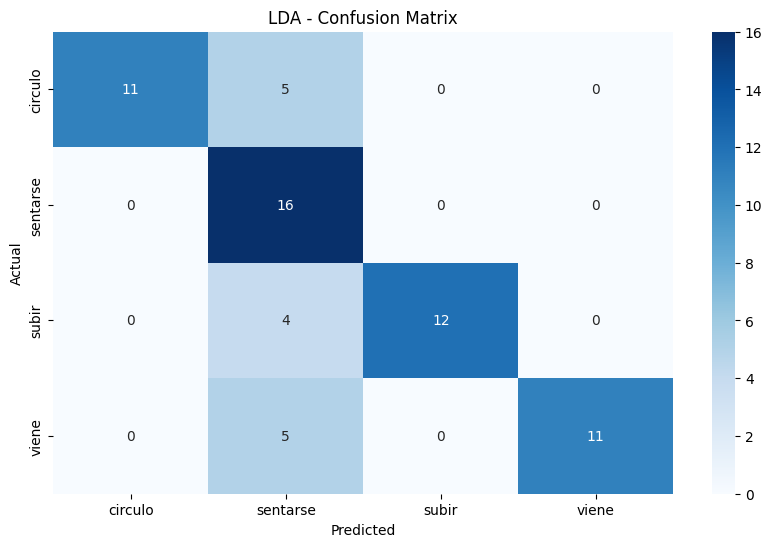

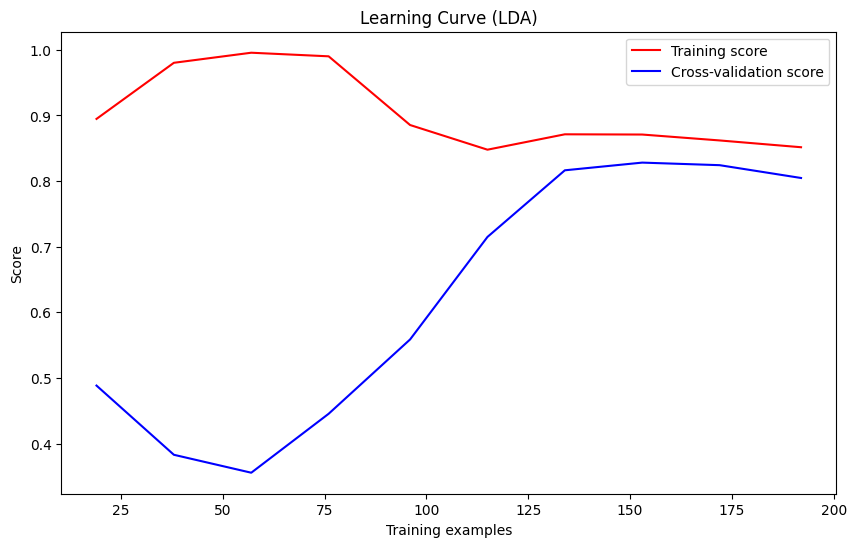

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd

# Cargar los datos
data = pd.read_csv('datasetPractice2.csv')
X = data.iloc[:, :64].values
y = data.iloc[:, 64].values

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo LDA
clf = LinearDiscriminantAnalysis(n_components=3)

# Validación cruzada con 4 pliegos
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Obtener las métricas mediante validación cruzada
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_precision = cross_val_score(clf, X_train, y_train, cv=cv, scoring='precision_weighted')
cross_val_recall = cross_val_score(clf, X_train, y_train, cv=cv, scoring='recall_weighted')
cross_val_f1 = cross_val_score(clf, X_train, y_train, cv=cv, scoring='f1_weighted')

# Mostrar los resultados de la validación cruzada
print(f"Cross-Validation Accuracy: {np.mean(cross_val_scores):.2f} ± {np.std(cross_val_scores):.2f}")
print(f"Cross-Validation Precision: {np.mean(cross_val_precision):.2f} ± {np.std(cross_val_precision):.2f}")
print(f"Cross-Validation Recall: {np.mean(cross_val_recall):.2f} ± {np.std(cross_val_recall):.2f}")
print(f"Cross-Validation F1 Score: {np.mean(cross_val_f1):.2f} ± {np.std(cross_val_f1):.2f}")

# Tiempo de entrenamiento
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

# Predicción y evaluación en el conjunto de prueba
y_pred = clf.predict(X_test)

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"\nTest Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1 Score: {f1:.2f}")
print(f"Training time: {train_time:.2f} seconds")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('LDA - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (LDA)")
plt.legend()
plt.show()


## KNN Cosine

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best parameters found: {'k': 7}
Training time: 1.77 seconds

### Cross-Validation Results (4 folds) ###
Accuracy scores per fold: [0.921875 0.9375   0.921875 0.921875]
Mean accuracy: 0.93
Standard deviation: 0.01

### Test Set Performance Metrics ###
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-Score: 0.91


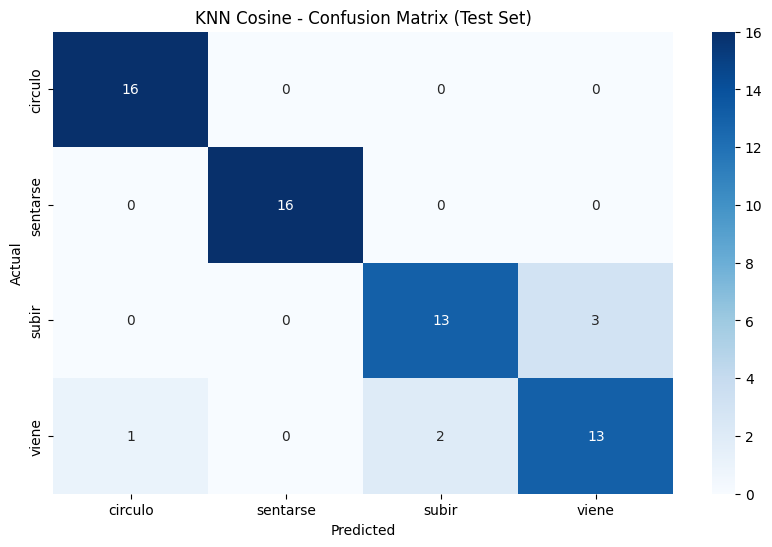

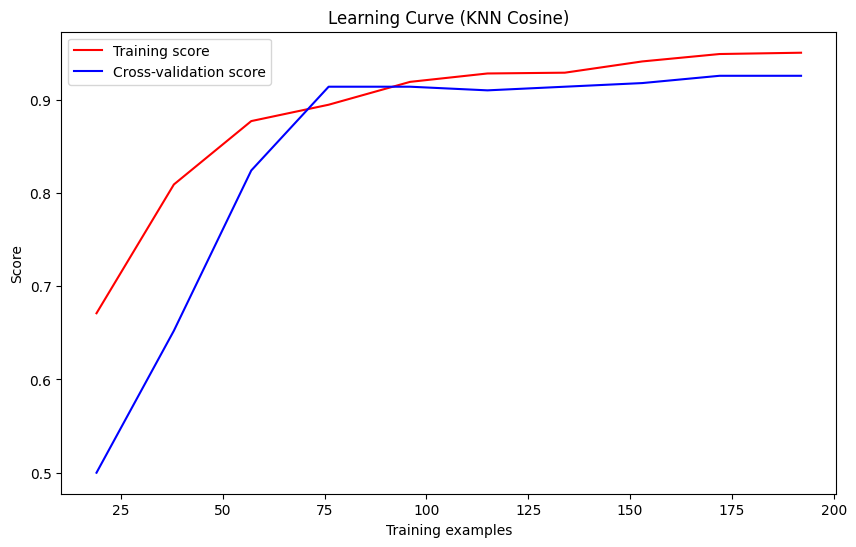

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import time
from sklearn.preprocessing import LabelEncoder

# Clase KNN con métrica de similitud coseno
class KNNWithCosine:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            # Calcular similitudes coseno
            similarities = cosine_similarity([x], self.X_train)[0]
            # Obtener los índices de los k vecinos más cercanos
            indices = similarities.argsort()[-self.k:][::-1]
            # Obtener las etiquetas de los vecinos más cercanos
            nearest_labels = self.y_train[indices]
            # Predicción por mayoría
            predictions.append(np.bincount(nearest_labels).argmax())
        return np.array(predictions)

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return accuracy_score(y_test, y_pred)

    # Métodos requeridos para que funcione con RandomizedSearchCV
    def get_params(self, deep=True):
        return {"k": self.k}

    def set_params(self, **params):
        self.k = params.get("k", self.k)
        return self

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear el codificador de etiquetas
le = LabelEncoder()

# Convertir las etiquetas en el conjunto de entrenamiento y prueba
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Hiperparámetros para RandomizedSearchCV
param_dist = {
    'k': randint(1, 20),  # Rango de vecinos (de 1 a 20)
}

# Inicializar el clasificador
clf = KNNWithCosine()
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)  # 4 pliegos para la validación cruzada

# Búsqueda aleatoria para encontrar los mejores hiperparámetros
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist,
                                   n_iter=10, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Tiempo de entrenamiento
start_time = time.time()
random_search.fit(X_train, y_train)
best_knn_model = random_search.best_estimator_
end_time = time.time()
train_time = end_time - start_time

# Resultados de la búsqueda de hiperparámetros
print(f"Best parameters found: {random_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada
cross_val_scores = cross_val_score(best_knn_model, X_train, y_train, cv=cv, scoring='accuracy')

print("\n### Cross-Validation Results (4 folds) ###")
print(f"Accuracy scores per fold: {cross_val_scores}")
print(f"Mean accuracy: {np.mean(cross_val_scores):.2f}")
print(f"Standard deviation: {np.std(cross_val_scores):.2f}")

# Evaluación del modelo en el conjunto de prueba
y_pred = best_knn_model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Mostrar métricas
print("\n### Test Set Performance Metrics ###")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('KNN Cosine - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_knn_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (KNN Cosine)")
plt.legend()
plt.show()


# Linear SVM, Quadratic SVM, Cubic SVM, Fifth SVM


## Linear SVM

Fitting 6 folds for each of 50 candidates, totalling 300 fits
Best parameters found: {'C': 3.845401188473625, 'kernel': 'linear'}
Training time: 1.85 seconds

### Cross-Validation Metrics (4 folds) ###
Cross-Validation Accuracy: 0.96 ± 0.02
Cross-Validation Precision: 0.97 ± 0.02
Cross-Validation Recall: 0.96 ± 0.02
Cross-Validation F1-Score: 0.96 ± 0.02

### Test Set Metrics ###
Test Accuracy: 0.97
Test Precision: 0.97
Test Recall: 0.97
Test F1-Score: 0.97


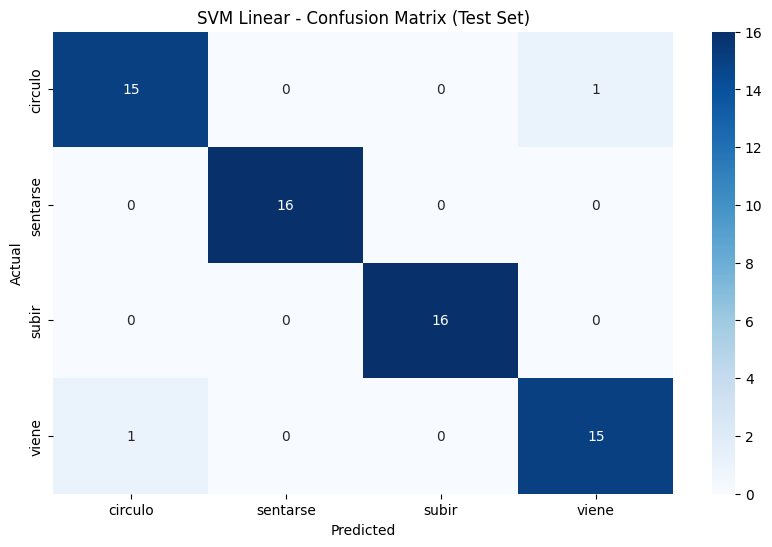

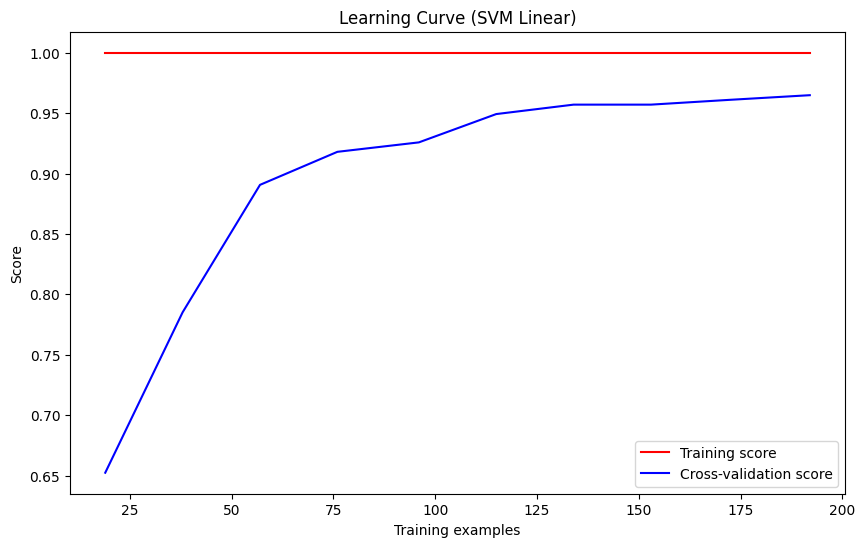

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para la búsqueda aleatoria
param_dist = {
    'C': uniform(0.1, 10),  # Valor del margen de SVM
    'kernel': ['linear'],   # Fijado como SVM lineal
}

classifier = SVC(random_state=0)

# Configurar 6 pliegos para RandomizedSearchCV
cv_random_search = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# RandomizedSearchCV para buscar los mejores hiperparámetros
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist,
                                   n_iter=50, cv=cv_random_search, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Tiempo de entrenamiento
start_time = time.time()

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Mejores hiperparámetros encontrados
print(f"Best parameters found: {random_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada con 4 pliegos para evaluar el modelo
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Métricas de validación cruzada
cv_accuracy = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
cv_precision = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='precision_weighted', n_jobs=-1)
cv_recall = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='recall_weighted', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)

print("\n### Cross-Validation Metrics (4 folds) ###")
print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.2f} ± {cv_accuracy.std():.2f}")
print(f"Cross-Validation Precision: {cv_precision.mean():.2f} ± {cv_precision.std():.2f}")
print(f"Cross-Validation Recall: {cv_recall.mean():.2f} ± {cv_recall.std():.2f}")
print(f"Cross-Validation F1-Score: {cv_f1.mean():.2f} ± {cv_f1.std():.2f}")

# Predicciones
y_pred = best_model.predict(X_test)

# Métricas del conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("\n### Test Set Metrics ###")
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('SVM Linear - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje usando los mejores hiperparámetros
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (SVM Linear)")
plt.legend()
plt.show()


## Quadratic SVM

Fitting 6 folds for each of 50 candidates, totalling 300 fits
Best parameters found: {'C': 9.795846277645586, 'coef0': 0.7751328233611146, 'degree': 2, 'kernel': 'poly'}
Training time: 2.26 seconds

### Cross-Validation Metrics (4 folds) ###
Cross-Validation Accuracy: 0.77 ± 0.02
Cross-Validation Precision: 0.86 ± 0.01
Cross-Validation Recall: 0.77 ± 0.02
Cross-Validation F1-Score: 0.78 ± 0.02

### Test Set Metrics ###
Test Accuracy: 0.78
Test Precision: 0.88
Test Recall: 0.78
Test F1-Score: 0.80


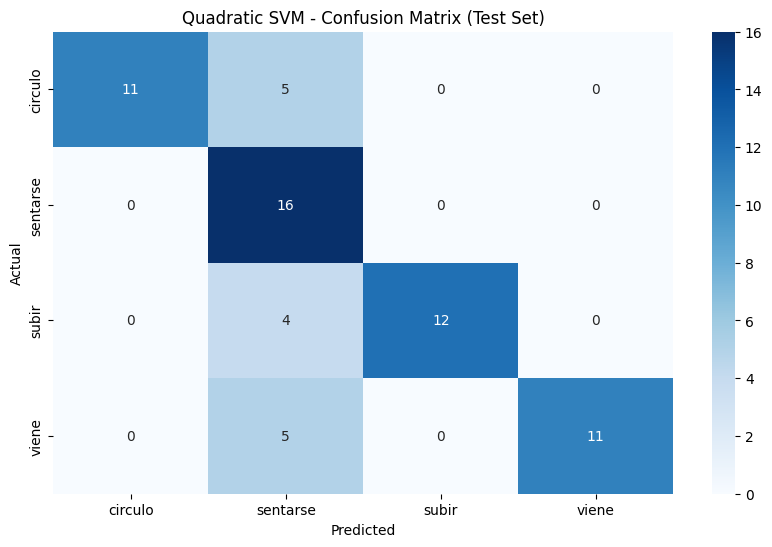

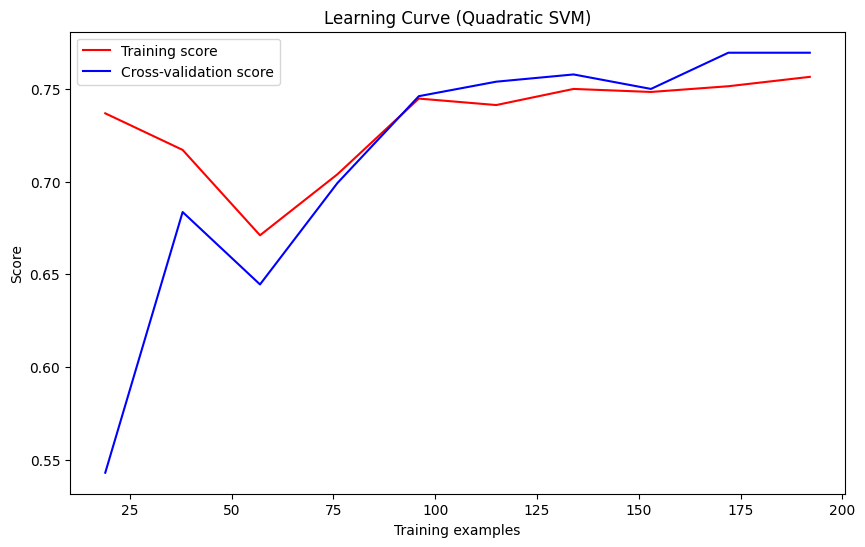

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para la búsqueda aleatoria
param_dist = {
    'C': uniform(0.1, 10),  # Valor del margen de SVM
    'degree': [2],          # Grado fijo en 2 para SVM cuadrático
    'coef0': uniform(0, 1), # Término independiente en el kernel
    'kernel': ['poly'],     # Kernel polinómico
}

classifier = SVC(random_state=0)

# Configurar 6 pliegos para RandomizedSearchCV
cv_random_search = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# RandomizedSearchCV para buscar los mejores hiperparámetros
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist,
                                   n_iter=50, cv=cv_random_search, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Tiempo de entrenamiento
start_time = time.time()

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Mejores hiperparámetros encontrados
print(f"Best parameters found: {random_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada con 4 pliegos para evaluar el modelo
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Métricas de validación cruzada
cv_accuracy = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
cv_precision = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='precision_weighted', n_jobs=-1)
cv_recall = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='recall_weighted', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)

print("\n### Cross-Validation Metrics (4 folds) ###")
print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.2f} ± {cv_accuracy.std():.2f}")
print(f"Cross-Validation Precision: {cv_precision.mean():.2f} ± {cv_precision.std():.2f}")
print(f"Cross-Validation Recall: {cv_recall.mean():.2f} ± {cv_recall.std():.2f}")
print(f"Cross-Validation F1-Score: {cv_f1.mean():.2f} ± {cv_f1.std():.2f}")

# Predicciones
y_pred = best_model.predict(X_test)

# Métricas del conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("\n### Test Set Metrics ###")
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Quadratic SVM - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje usando los mejores hiperparámetros
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (Quadratic SVM)")
plt.legend()
plt.show()


## Cubic SVM

Fitting 6 folds for each of 50 candidates, totalling 300 fits
Best parameters found: {'C': 9.756320330745593, 'coef0': 0.8083973481164611, 'degree': 3, 'kernel': 'poly'}
Training time: 1.71 seconds

### Cross-Validation Metrics (4 folds) ###
Cross-Validation Accuracy: 0.77 ± 0.03
Cross-Validation Precision: 0.86 ± 0.02
Cross-Validation Recall: 0.77 ± 0.03
Cross-Validation F1-Score: 0.78 ± 0.03

### Test Set Metrics ###
Test Accuracy: 0.78
Test Precision: 0.88
Test Recall: 0.78
Test F1-Score: 0.80


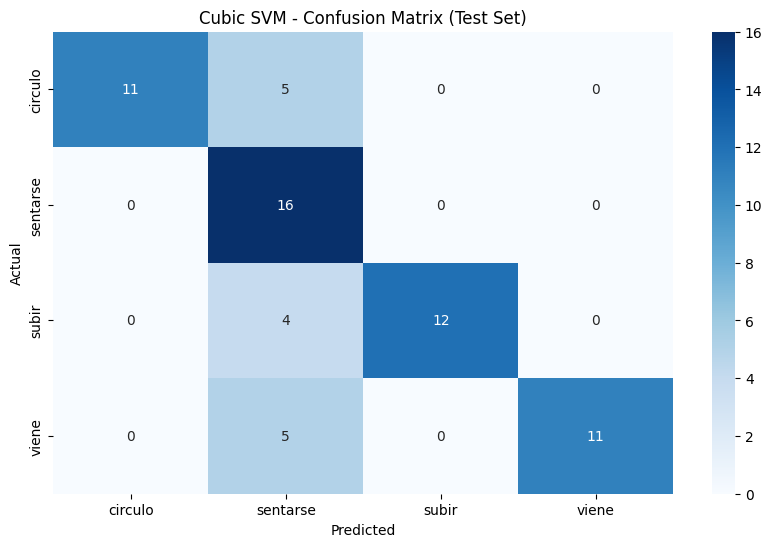

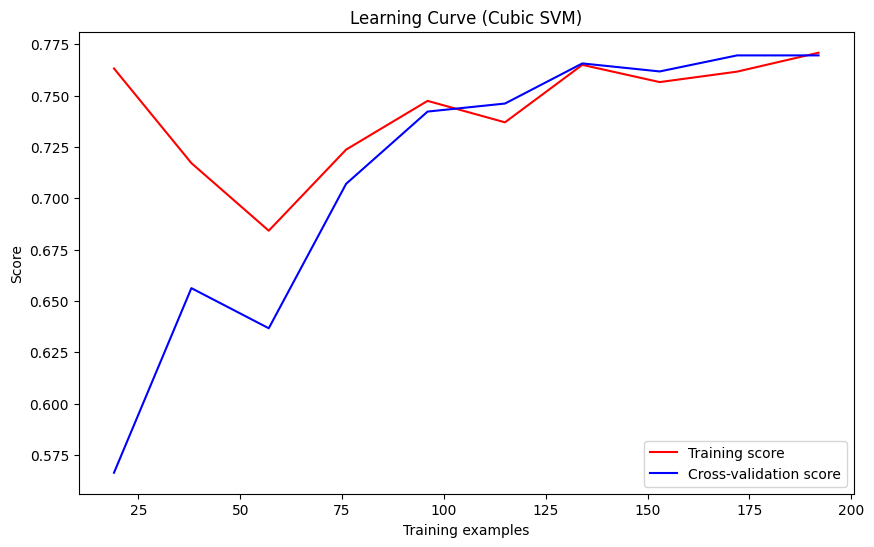

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para la búsqueda aleatoria
param_dist = {
    'C': uniform(0.1, 10),  # Valor del margen de SVM
    'degree': [3],          # Grado fijo en 3 para SVM cúbico
    'coef0': uniform(0, 1), # Término independiente en el kernel
    'kernel': ['poly'],     # Kernel polinómico
}

classifier = SVC(random_state=0)

# Configurar 6 pliegos para RandomizedSearchCV
cv_random_search = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# RandomizedSearchCV para buscar los mejores hiperparámetros
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist,
                                   n_iter=50, cv=cv_random_search, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Tiempo de entrenamiento
start_time = time.time()

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Mejores hiperparámetros encontrados
print(f"Best parameters found: {random_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada con 4 pliegos para evaluar el modelo
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Métricas de validación cruzada
cv_accuracy = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
cv_precision = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='precision_weighted', n_jobs=-1)
cv_recall = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='recall_weighted', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)

print("\n### Cross-Validation Metrics (4 folds) ###")
print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.2f} ± {cv_accuracy.std():.2f}")
print(f"Cross-Validation Precision: {cv_precision.mean():.2f} ± {cv_precision.std():.2f}")
print(f"Cross-Validation Recall: {cv_recall.mean():.2f} ± {cv_recall.std():.2f}")
print(f"Cross-Validation F1-Score: {cv_f1.mean():.2f} ± {cv_f1.std():.2f}")

# Predicciones
y_pred = best_model.predict(X_test)

# Métricas del conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("\n### Test Set Metrics ###")
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Cubic SVM - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje usando los mejores hiperparámetros
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (Cubic SVM)")
plt.legend()
plt.show()


## FIFTH SVM

Fitting 6 folds for each of 50 candidates, totalling 300 fits
Best parameters found: {'C': 9.756320330745593, 'coef0': 0.8083973481164611, 'degree': 5, 'kernel': 'poly'}
Training time: 1.70 seconds

### Cross-Validation Metrics (4 folds) ###
Cross-Validation Accuracy: 0.77 ± 0.03
Cross-Validation Precision: 0.86 ± 0.02
Cross-Validation Recall: 0.77 ± 0.03
Cross-Validation F1-Score: 0.78 ± 0.03

### Test Set Metrics ###
Test Accuracy: 0.78
Test Precision: 0.88
Test Recall: 0.78
Test F1-Score: 0.80


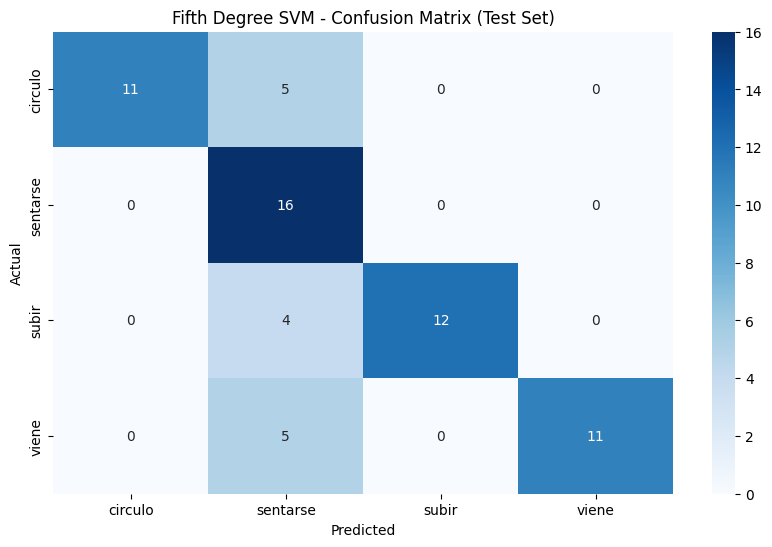

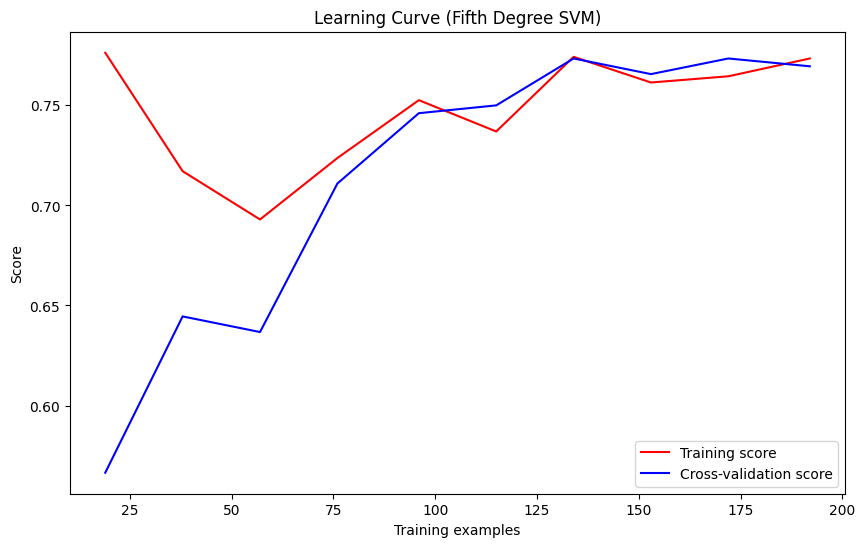

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Cargar el archivo CSV
data = pd.read_csv('datasetPractice2.csv')

# Separar predictores y etiquetas
X = data.iloc[:, :64].values  # Las primeras 64 columnas son las variables predictoras
y = data.iloc[:, 64].values   # La última columna (65) es la etiqueta

# Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparámetros para la búsqueda aleatoria
param_dist = {
    'C': uniform(0.1, 10),  # Valor del margen de SVM
    'degree': [5],          # Grado fijo en 5 para SVM de quinto grado
    'coef0': uniform(0, 1), # Término independiente en el kernel
    'kernel': ['poly'],     # Kernel polinómico
}

classifier = SVC(random_state=0)

# Configurar 6 pliegos para RandomizedSearchCV
cv_random_search = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# RandomizedSearchCV para buscar los mejores hiperparámetros
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist,
                                   n_iter=50, cv=cv_random_search, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Tiempo de entrenamiento
start_time = time.time()

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

end_time = time.time()
train_time = end_time - start_time

# Mejores hiperparámetros encontrados
print(f"Best parameters found: {random_search.best_params_}")
print(f"Training time: {train_time:.2f} seconds")

# Validación cruzada con 4 pliegos para evaluar el modelo
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Métricas de validación cruzada
cv_accuracy = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
cv_precision = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='precision_weighted', n_jobs=-1)
cv_recall = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='recall_weighted', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)

print("\n### Cross-Validation Metrics (4 folds) ###")
print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.2f} ± {cv_accuracy.std():.2f}")
print(f"Cross-Validation Precision: {cv_precision.mean():.2f} ± {cv_precision.std():.2f}")
print(f"Cross-Validation Recall: {cv_recall.mean():.2f} ± {cv_recall.std():.2f}")
print(f"Cross-Validation F1-Score: {cv_f1.mean():.2f} ± {cv_f1.std():.2f}")

# Predicciones
y_pred = best_model.predict(X_test)

# Métricas del conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("\n### Test Set Metrics ###")
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Fifth Degree SVM - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generar la curva de aprendizaje usando los mejores hiperparámetros
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color='r')
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color='b')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (Fifth Degree SVM)")
plt.legend()
plt.show()
